<a href="https://colab.research.google.com/github/kunal077/Financial-Engineering/blob/main/YieldCurveConstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
!pip install quandl
import quandl

#Import Model Packages 
from sklearn.decomposition import PCA

In [4]:

#The API Key can be optained from Quandl website by registering. 
quandl.ApiConfig.api_key = 'xsr5aji3D4Fvx3N4hg5f'

In [5]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [6]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
dataset = treasury_df
type(dataset)

pandas.core.frame.DataFrame

In [9]:
# shape
dataset.shape

(14795, 11)

In [10]:
set_option('display.width', 100)
dataset.tail(5)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2021-03-19,0.01,0.01,0.03,0.07,0.16,0.33,0.90,1.38,1.74,2.36,2.45
2021-03-22,0.02,0.03,0.05,0.06,0.15,0.32,0.87,1.34,1.69,2.29,2.38
2021-03-23,0.02,0.01,0.04,0.08,0.15,0.31,0.83,1.29,1.63,2.24,2.34
2021-03-24,0.02,0.02,0.04,0.07,0.14,0.31,0.83,1.27,1.62,2.21,2.31
2021-03-25,0.02,0.02,0.04,0.07,0.14,0.30,0.82,1.29,1.63,2.24,2.34


In [11]:
#types
set_option('display.max_rows', 500)
dataset.dtypes

TRESY1mo    float64
TRESY3mo    float64
TRESY6mo    float64
TRESY1y     float64
TRESY2y     float64
TRESY3y     float64
TRESY5y     float64
TRESY7y     float64
TRESY10y    float64
TRESY20y    float64
TRESY30y    float64
dtype: object

In [12]:
set_option('precision', 3)
dataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,4914.000,9890.000,9890.000,14792.000,11200.000,14792.000,14792.000,12922.000,14792.000,14795.000,11022.000
mean,1.235,3.867,4.050,4.998,5.139,5.409,5.672,6.042,6.010,6.274,6.432
std,1.464,3.237,3.352,3.431,3.793,3.312,3.176,3.235,2.962,2.807,3.017
min,0.000,0.000,0.020,0.060,0.090,0.100,0.190,0.360,0.520,0.870,0.990
25%,0.070,0.910,1.000,2.300,1.630,2.840,3.350,3.310,3.980,4.225,4.230
50%,0.800,3.755,3.955,5.040,4.990,5.450,5.610,6.160,5.790,6.000,5.910
75%,1.880,5.820,6.060,6.920,7.580,7.360,7.590,7.920,7.740,7.930,8.350
max,5.270,17.010,17.430,17.310,16.950,16.590,16.270,16.050,15.840,15.780,15.210


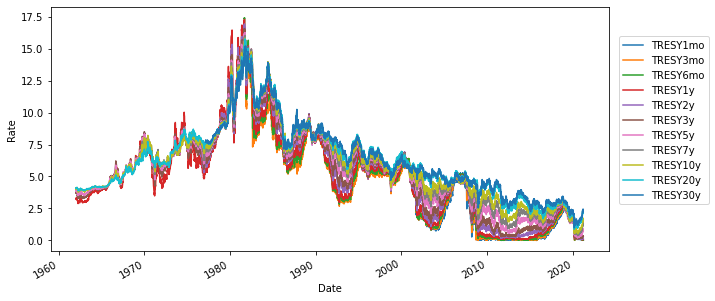

In [13]:
dataset.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

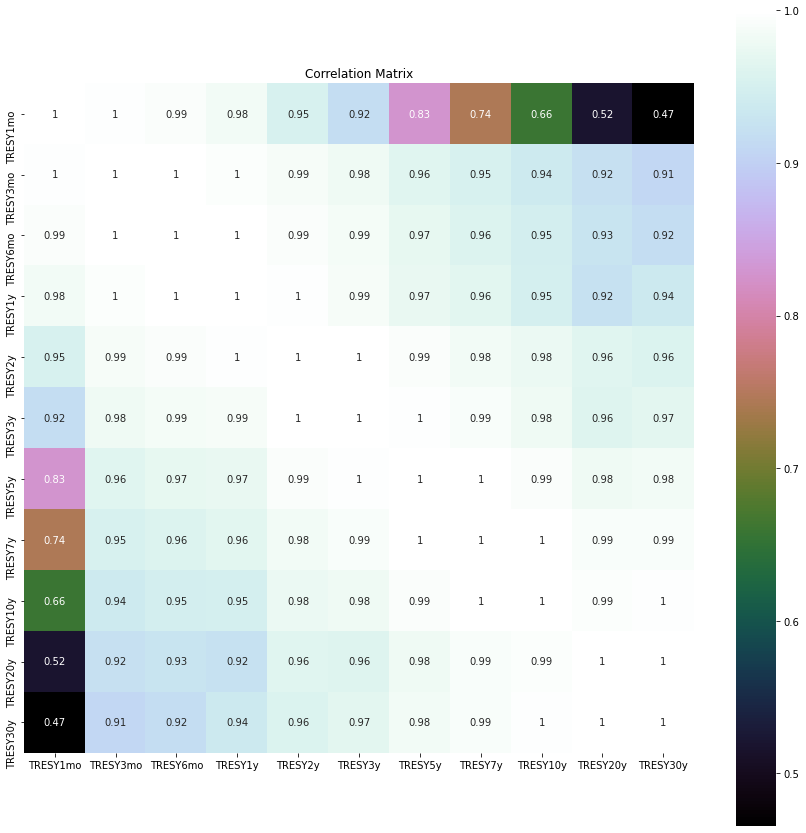

In [14]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [15]:
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [16]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head(2)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset),columns = dataset.columns, index = dataset.index)
# summarize transformed data
dataset.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2001-07-31,1.663,1.514,1.368,1.366,1.452,1.540,1.683,1.712,1.673,1.595,1.541
2001-08-01,1.650,1.508,1.368,1.386,1.480,1.562,1.722,1.744,1.707,1.611,1.559


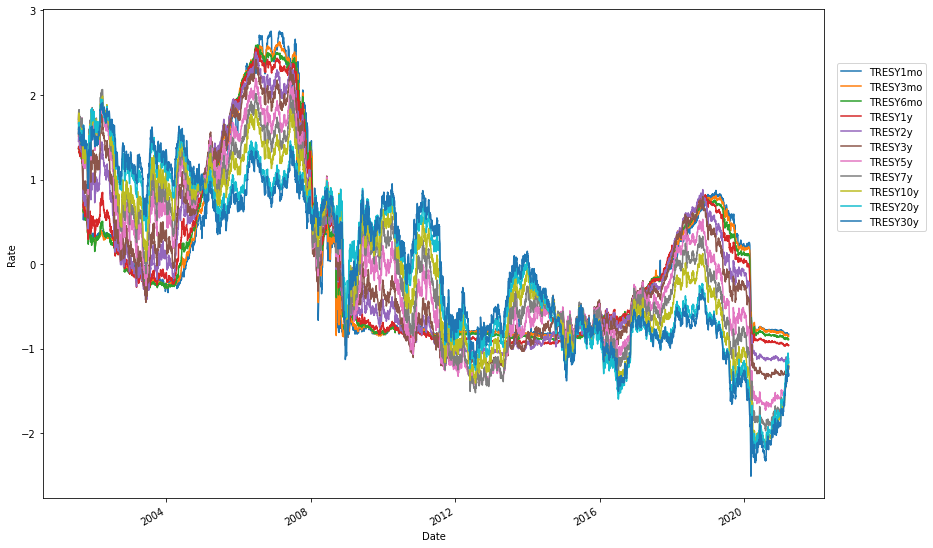

In [18]:
rescaledDataset.plot(figsize=(14,10))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

In [22]:
pca = PCA()
PrincipalComponent=pca.fit(rescaledDataset)

,Explained Variance_Top 5
0,84.23%
1,98.92%
2,99.77%
3,99.89%
4,99.94%


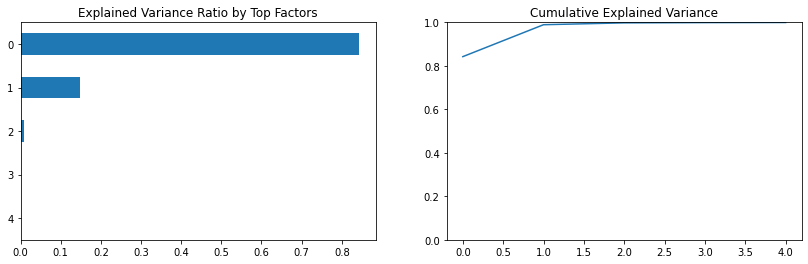

In [23]:
NumEigenvalues=5
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');

# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)

In [24]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

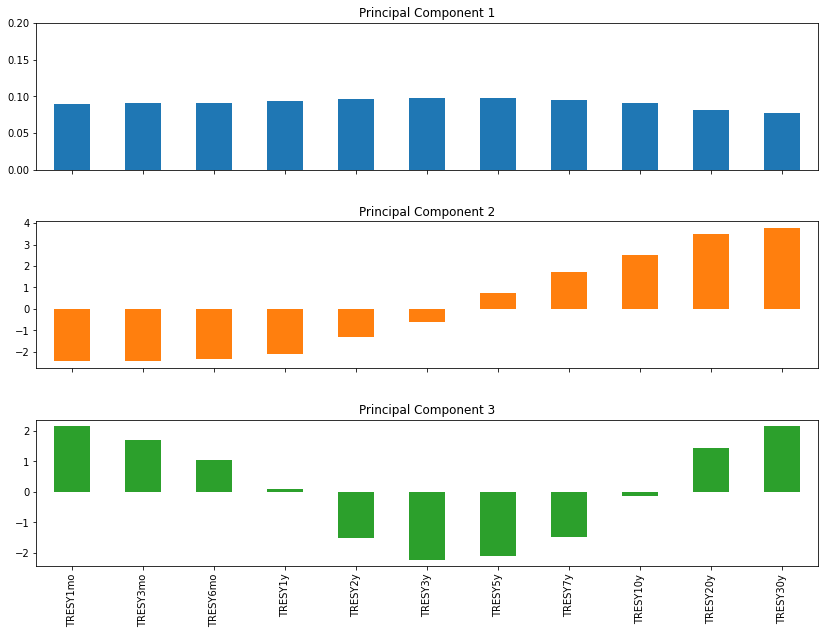

In [26]:
weights = PCWeights()
NumComponents=3    
        
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

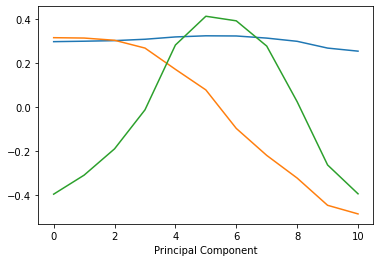

In [27]:
plt.plot(pca.components_[0:3].T)
plt.xlabel("Principal Component")
plt.show()

In [28]:
pca.transform(rescaledDataset)[:,:2]

array([[ 5.14540062, -0.40254033],
       [ 5.20358295, -0.43510003],
       [ 5.30698899, -0.49373591],
       ...,
       [-3.60198907,  0.59706049],
       [-3.62535022,  0.62659312],
       [-3.60919197,  0.596356  ]])

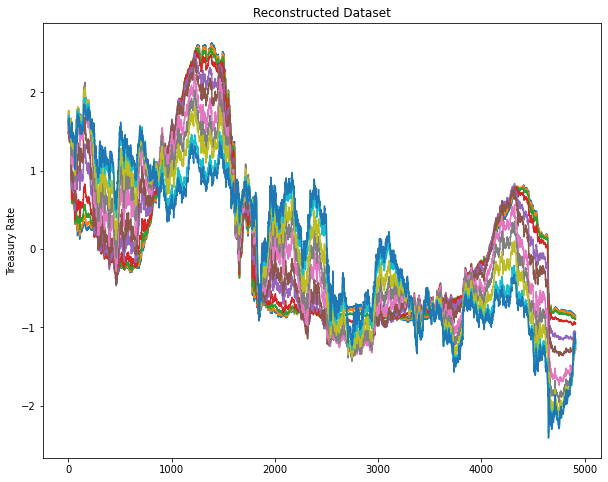

In [29]:
nComp=3
reconst= pd.DataFrame(np.dot(pca.transform(rescaledDataset)[:,:nComp], pca.components_[:nComp,:]),columns=dataset.columns)
plt.figure(figsize=(10,8))
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Reconstructed Dataset")
plt.show()